# Tasks:

1. Merge Netflix with IMDB data to find out the top rated movies on IMDB users. Find out the top rated movies from the following perspective:
    * users' age group
    * gender of users
    * contients
    * genre    
2. Do some EDA tasks including:
    * the distribution of TV shows and movies in Netflix over countries, years, genres, etc.
    * the top 10 famous directors and actors based on the rate of movies. 
3. Provide recommendation movies based on the key words.

In [1]:
import psycopg2
conn = psycopg2.connect(host="localhost",database="t81577", user="postgres", password="postgres")

ModuleNotFoundError: No module named 'psycopg2'

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

# Loading Data

In [3]:
path_netflix = open('./Data/netflix/netflix_titles.csv')
netflix = pd.read_csv(path_netflix)
nf_movies = netflix[netflix['type'] == 'Movie']
nf_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


In [4]:
path_IMDB_movies = open('./Data/IMDB/IMDb_movies.csv')
path_IMDB_ratings = open('./Data/IMDB/IMDb_ratings.csv')
imdb_movies = pd.read_csv(path_IMDB_movies)
imdb_movies = imdb_movies[['imdb_title_id', 'title', 'year']]
imdb_ratings = pd.read_csv(path_IMDB_ratings)
imdb = pd.merge(imdb_movies, imdb_ratings, on='imdb_title_id')
imdb.head()

/Library/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,imdb_title_id,title,year,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,Miss Jerry,1894,5.9,154,5.9,6.0,12,4,10,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,The Story of the Kelly Gang,1906,6.1,589,6.3,6.0,57,18,58,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,Den sorte drøm,1911,5.8,188,6.0,6.0,6,6,17,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,Cleopatra,1912,5.2,446,5.3,5.0,15,8,16,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,L'Inferno,1911,7.0,2237,6.9,7.0,210,225,436,...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [5]:
nf = nf_movies[['title', 'release_year', 'listed_in', 'country']]
nf = nf.rename(columns={'release_year': 'year',
                        'listed_in': 'genres'})
nf.head()

,title,year,genres,country
1,7:19,2016,"Dramas, International Movies",Mexico
2,23:59,2011,"Horror Movies, International Movies",Singapore
3,9,2009,"Action & Adventure, Independent Movies, Sci-Fi...",United States
4,21,2008,Dramas,United States
6,122,2019,"Horror Movies, International Movies",Egypt


Title: official movie title

Year: the year that the movie released

Genres: relevant genres of the movies which allow us to find the best movies from different genres

Country: country where the movie was produced which allow us to find the the best movies from different countries.

In [6]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85855 entries, 0 to 85854
Data columns (total 51 columns):
imdb_title_id                85855 non-null object
title                        85855 non-null object
year                         85855 non-null object
weighted_average_vote        85855 non-null float64
total_votes                  85855 non-null int64
mean_vote                    85855 non-null float64
median_vote                  85855 non-null float64
votes_10                     85855 non-null int64
votes_9                      85855 non-null int64
votes_8                      85855 non-null int64
votes_7                      85855 non-null int64
votes_6                      85855 non-null int64
votes_5                      85855 non-null int64
votes_4                      85855 non-null int64
votes_3                      85855 non-null int64
votes_2                      85855 non-null int64
votes_1                      85855 non-null int64
allgenders_0age_avg_vote     333

There are 51 features, I would choose 31 features, which are:

title                        
year                         
weighted_average_vote
allgenders_0age_avg_vote     
allgenders_0age_votes        
allgenders_18age_avg_vote    
allgenders_18age_votes       
allgenders_30age_avg_vote    
allgenders_30age_votes       
allgenders_45age_avg_vote   
allgenders_45age_votes       
males_allages_avg_vote       
males_allages_votes          
males_0age_avg_vote          
males_0age_votes             
males_18age_avg_vote         
males_18age_votes            
males_30age_avg_vote         
males_30age_votes            
males_45age_avg_vote         
males_45age_votes            
females_allages_avg_vote     
females_allages_votes        
females_0age_avg_vote        
females_0age_votes           
females_18age_avg_vote       
females_18age_votes          
females_30age_avg_vote       
females_30age_votes          
females_45age_avg_vote       
females_45age_votes 

There are some columns contains some Null values, for the reason that those groups do not rate these movies,like age or the movies are not popular. So I choose to use 0 to replace the Null values.

In [7]:
imdb = imdb[['title', 'year', 'weighted_average_vote', 'allgenders_0age_avg_vote', 'allgenders_0age_votes', 'allgenders_18age_avg_vote', 'allgenders_18age_votes',
             'allgenders_30age_avg_vote', 'allgenders_30age_votes', 'allgenders_45age_avg_vote', 'allgenders_45age_votes',
             'males_allages_avg_vote', 'males_allages_votes', 'males_0age_avg_vote', 'males_0age_votes',
             'males_18age_avg_vote', 'males_18age_votes', 'males_30age_avg_vote', 'males_30age_votes', 
             'males_45age_avg_vote', 'males_45age_votes', 'females_allages_avg_vote', 'females_allages_votes',
             'females_0age_avg_vote', 'females_0age_votes', 'females_18age_avg_vote', 'females_18age_votes',
             'females_30age_avg_vote', 'females_30age_votes', 'females_45age_avg_vote', 'females_45age_votes']]
imdb = imdb.fillna(0)

In [8]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85855 entries, 0 to 85854
Data columns (total 31 columns):
title                        85855 non-null object
year                         85855 non-null object
weighted_average_vote        85855 non-null float64
allgenders_0age_avg_vote     85855 non-null float64
allgenders_0age_votes        85855 non-null float64
allgenders_18age_avg_vote    85855 non-null float64
allgenders_18age_votes       85855 non-null float64
allgenders_30age_avg_vote    85855 non-null float64
allgenders_30age_votes       85855 non-null float64
allgenders_45age_avg_vote    85855 non-null float64
allgenders_45age_votes       85855 non-null float64
males_allages_avg_vote       85855 non-null float64
males_allages_votes          85855 non-null float64
males_0age_avg_vote          85855 non-null float64
males_0age_votes             85855 non-null float64
males_18age_avg_vote         85855 non-null float64
males_18age_votes            85855 non-null float64
males_30a

# Merging datasets

In [9]:
merged = nf.merge(imdb, how="inner", left_on=['title', 'year'], right_on=['title', 'year'])
merged.head()

,title,year,genres,country,weighted_average_vote,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,...,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes
0,23:59,2011,"Horror Movies, International Movies",Singapore,4.6,1.0,1.0,4.4,132.0,4.8,...,5.1,151.0,0.0,0.0,4.5,39.0,5.3,63.0,5.3,38.0
1,9,2009,"Action & Adventure, Independent Movies, Sci-Fi...",United States,7.1,7.1,73.0,7.1,26104.0,7.0,...,7.2,19385.0,7.1,14.0,7.3,6146.0,7.2,10800.0,7.2,1662.0
2,21,2008,Dramas,United States,6.8,6.7,48.0,7.0,52353.0,6.7,...,6.9,30105.0,7.1,9.0,7.1,10664.0,6.8,16011.0,6.8,2201.0
3,1920,2008,"Horror Movies, International Movies, Thrillers",India,6.4,10.0,1.0,6.5,862.0,6.3,...,6.1,205.0,0.0,0.0,6.4,58.0,5.8,97.0,6.2,30.0
4,Æon Flux,2005,"Action & Adventure, Sci-Fi & Fantasy",United States,5.5,4.2,14.0,5.4,14487.0,5.4,...,5.8,15493.0,7.0,4.0,5.9,3127.0,5.7,9521.0,5.9,2280.0


In [10]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 620 entries, 0 to 619
Data columns (total 33 columns):
title                        620 non-null object
year                         620 non-null object
genres                       620 non-null object
country                      616 non-null object
weighted_average_vote        620 non-null float64
allgenders_0age_avg_vote     620 non-null float64
allgenders_0age_votes        620 non-null float64
allgenders_18age_avg_vote    620 non-null float64
allgenders_18age_votes       620 non-null float64
allgenders_30age_avg_vote    620 non-null float64
allgenders_30age_votes       620 non-null float64
allgenders_45age_avg_vote    620 non-null float64
allgenders_45age_votes       620 non-null float64
males_allages_avg_vote       620 non-null float64
males_allages_votes          620 non-null float64
males_0age_avg_vote          620 non-null float64
males_0age_votes             620 non-null float64
males_18age_avg_vote         620 non-null float64

In [11]:
merged[merged['country'].isnull()]

,title,year,genres,country,weighted_average_vote,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,...,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes
6,3 Deewarein,2003,"Dramas, International Movies, Thrillers",NaN,7.8,0.0,0.0,7.8,243.0,7.9,...,7.8,175.0,0.0,0.0,7.6,18.0,7.7,112.0,8.0,35.0
74,Been So Long,2018,"Dramas, International Movies, Music & Musicals",NaN,5.4,4.5,5.0,5.6,156.0,5.3,...,5.9,273.0,2.0,3.0,5.8,79.0,5.7,118.0,6.3,42.0
260,Jis Desh Men Ganga Behti Hai,1960,"Action & Adventure, Dramas, International Movies",NaN,7.4,0.0,0.0,7.3,47.0,7.6,...,8.0,47.0,0.0,0.0,7.6,9.0,8.5,28.0,6.4,10.0
506,Tanda Tanya,2011,"Dramas, International Movies",NaN,7.1,0.0,0.0,7.1,69.0,6.9,...,6.9,37.0,0.0,0.0,6.9,23.0,7.2,13.0,4.0,1.0


In [12]:
merged.loc[6, 'country'] = 'India'
merged.loc[74, 'country'] = 'United Kingdom'
merged.loc[260, 'country'] = 'India'
merged.loc[506, 'country'] = 'Indonesia'

# Top 10 movies by age and gender

In [13]:
def top10(column, group):
    titles = []
    scores = []
    top10=merged[column].nlargest(10)
    for i in range(len(top10)):
        index = top10.index[i]
        score = top10.iloc[i]
        scores.append(score)
        title = merged['title'].iloc[index]
        titles.append(title)
        print(i+1, '.', title, ':', score)

In [14]:
top10('weighted_average_vote', ' Overall')

1 . Pulp Fiction : 8.9
2 . Schindler's List : 8.9
3 . Inception : 8.8
4 . City of God : 8.6
5 . Gol Maal : 8.6
6 . Koshish : 8.6
7 . Oththa Seruppu Size 7 : 8.6
8 . American History X : 8.5
9 . Black Friday : 8.5
10 . 3 Idiots : 8.4


In [15]:
top10('allgenders_0age_avg_vote', ' by Under 18s - Both Genders')

1 . 1920 : 10.0
2 . Guna 369 : 10.0
3 . House Arrest : 10.0
4 . Krishna and His Leela : 10.0
5 . Uriyadi 2 : 10.0
6 . Wira : 10.0
7 . Uma Maheswara Ugra Roopasya : 9.8
8 . Oththa Seruppu Size 7 : 9.6
9 . Teenage Cocktail : 9.5
10 . Pulp Fiction : 9.1


In [16]:
top10('allgenders_18age_avg_vote', ' by Users Aged 18-30')

1 . Inception : 9.0
2 . Schindler's List : 9.0
3 . Pulp Fiction : 8.9
4 . 3 Idiots : 8.7
5 . Black Friday : 8.7
6 . City of God : 8.7
7 . Oththa Seruppu Size 7 : 8.7
8 . Waar : 8.7
9 . American History X : 8.6
10 . Django Unchained : 8.6


# Top 10 movies by Genre

In [44]:
def genrestop10(genre_string, column, group):
    titles = []
    scores = []
    genre = []
    for i in range(len(merged)):
        row = merged.iloc[i]
        if genre_string in row['genres']:
            genre.append(row)
   
    genre = pd.DataFrame(genre)
    top10=genre[column].nlargest(10)
    for i in range(len(top10)):
        index = top10.index[i]
        score = top10.iloc[i]
        scores.append(score)
        title = merged['title'].iloc[index]
        titles.append(title)
        print(i+1, '.', title, ':', score)

In [45]:
genrestop10('Horror', 'weighted_average_vote', ' Overall')

1 . The Blue Elephant 2 : 8.3
2 . Shutter : 7.1
3 . The Ring : 7.1
4 . Tremors : 7.1
5 . Cloverfield : 7.0
6 . Insidious : 6.8
7 . Final Destination : 6.7
8 . Phobia 2 : 6.7
9 . Bulbbul : 6.6
10 . Bhoot : 6.5


In [46]:
genrestop10('Comedies', 'weighted_average_vote', ' Overall')

1 . Gol Maal : 8.6
2 . 3 Idiots : 8.4
3 . Chupke Chupke : 8.3
4 . Andaz Apna Apna : 8.2
5 . Barfi! : 8.1
6 . Dil Chahta Hai : 8.1
7 . Trainspotting : 8.1
8 . Zindagi Na Milegi Dobara : 8.1
9 . Bawarchi : 8.0
10 . I Am Kalam : 8.0


In [47]:
genrestop10('Action', 'weighted_average_vote', ' Overall')

1 . Inception : 8.8
2 . Django Unchained : 8.4
3 . Andaz Apna Apna : 8.2
4 . A Wednesday : 8.1
5 . Platoon : 8.1
6 . Rocky : 8.1
7 . Casino Royale : 8.0
8 . Company : 8.0
9 . Ip Man : 8.0
10 . District 9 : 7.9


# Distribution of rates of different genres 

In [74]:
subframe = []
first_genre_list = []
for i in range(len(merged)):
    row = merged.iloc[i]
    if 'Horror' in row['genres']:
        first_genre_list.append('Horror')
        subframe.append(row)
    elif 'Comedies' in row['genres']:
        first_genre_list.append('Comedy')
        subframe.append(row)
    elif 'Children & Family Movies' in row['genres']:
        first_genre_list.append('Family')
        subframe.append(row)
    elif 'Romantic Movies' in row['genres']:
        first_genre_list.append('Romance')
        subframe.append(row)
    elif 'Action' in row['genres']:
        first_genre_list.append('Action')
        subframe.append(row)

subframe = pd.DataFrame(subframe)
subframe['first_genre'] = first_genre_list

sns.displot(subframe, x="weighted_average_vote", hue="first_genre")

AttributeError: module 'seaborn' has no attribute 'displot'

In [75]:
sns.__version__

'0.9.0'

# Top movies by continent

In [60]:
for i in range(len(merged['country'])):
    split = merged['country'].iloc[i].split(',')
    merged['country'].iloc[i] = split[0]
    if merged['country'].iloc[i] == 'Soviet Union':
        merged['country'].iloc[i] = 'Russia'

continents = {
    'AF': 'Africa',
    'AS': 'Asia',
    'OC': 'Australia',
    'EU': 'Europe',
    'NA': 'North America',
    'SA': 'South America'
}
countries = merged['country']

merged['continent'] = [continents[country_alpha2_to_continent_code(country_name_to_country_alpha2(country))] for country in countries]

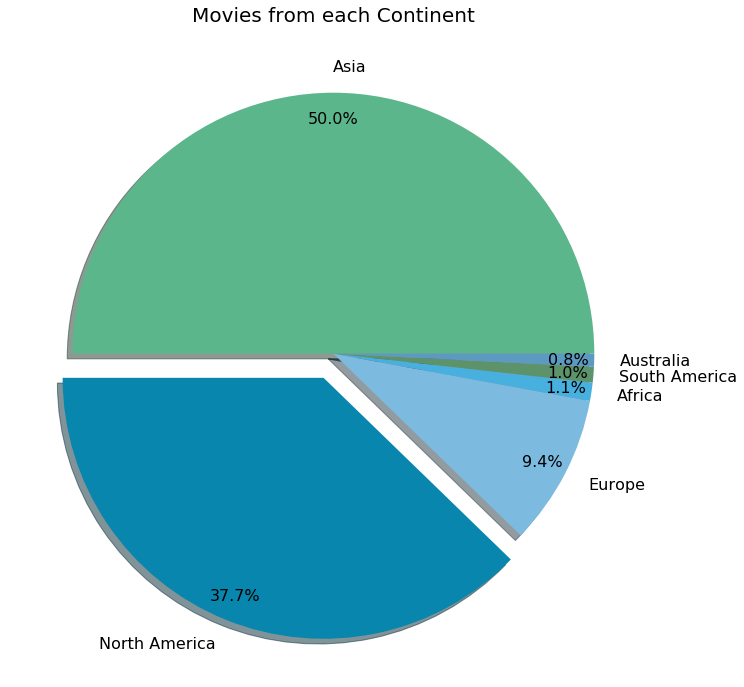

In [61]:
data = merged['continent'].value_counts(normalize=True) * 100
labels = data.keys()

pie, ax = plt.subplots(figsize=[12,12])
patches, texts, autotexts = plt.pie(x=data, autopct="%.1f%%", pctdistance=0.9, labels=labels, textprops={'fontsize': 16}, shadow=True, explode=[0,0.1,0,0,0,0], colors=['#5cb68b','#0886ad','#7cbbdf','#48b0df','#5c936a','#5c9ac1'])
plt.title("Movies from each Continent", fontsize=20);

In [64]:
def continentstop10(continent_string, column, group):
    titles = []
    scores = []
    continent = []
    for i in range(len(merged)):
        row = merged.iloc[i]
        if row['continent'] == continent_string:
            continent.append(row)
    continent = pd.DataFrame(continent)
    top10=continent[column].nlargest(10)
    for i in range(len(top10)):
        index = top10.index[i]
        score = top10.iloc[i]
        scores.append(score)
        title = merged['title'].iloc[index]
        titles.append(title)
        print(i+1, '.', title, ':', score)

In [65]:
continentstop10('Asia', 'weighted_average_vote', ' Overall')

1 . Gol Maal : 8.6
2 . Koshish : 8.6
3 . Oththa Seruppu Size 7 : 8.6
4 . Black Friday : 8.5
5 . 3 Idiots : 8.4
6 . Masoom : 8.4
7 . Sadma : 8.4
8 . Chupke Chupke : 8.3
9 . Andaz Apna Apna : 8.2
10 . Article 15 : 8.2


In [66]:
continentstop10('Africa', 'weighted_average_vote', ' Overall')

1 . The Blue Elephant 2 : 8.3
2 . District 9 : 7.9
3 . Material : 7.3
4 . Phone Swap : 6.1
5 . Boushkash : 5.0
6 . Seriously Single : 4.2
7 . Santana : 3.9


In [67]:
continentstop10('Europe', 'weighted_average_vote', ' Overall')

1 . Gran Torino : 8.1
2 . Trainspotting : 8.1
3 . Casino Royale : 8.0
4 . Moon : 7.9
5 . The Artist : 7.9
6 . Billy Elliot : 7.7
7 . Les Misérables : 7.6
8 . Lolita : 7.6
9 . Stardust : 7.6
10 . The Impossible : 7.6


In [68]:
continentstop10('North America', 'weighted_average_vote', ' Overall')

1 . Pulp Fiction : 8.9
2 . Schindler's List : 8.9
3 . Inception : 8.8
4 . American History X : 8.5
5 . Django Unchained : 8.4
6 . American Beauty : 8.3
7 . Taxi Driver : 8.3
8 . Platoon : 8.1
9 . Rocky : 8.1
10 . Dallas Buyers Club : 8.0
